# Key Points about Rigde Regression

### How coefficient get effected ? What will be the impact of increasing value of lambda(λ)?

In Rigde regression **extra term** is added in the normal **loss function** to minimize the **overfitting** of the model.
The extra term is : **λ * $||W||^{2}$**    where $||W||^{2}$ = ($w1^{2}$ + $w1^{2}$ + .... + $wn^{2}$) $x^{2}$ 

Ans: By increasing the value of lambda, the values of w will srink towards 0(zero) but never become zero.

In [4]:
from sklearn.datasets import load_diabetes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
data = load_diabetes()

df = pd.DataFrame(data.data, columns= data.feature_names)
df['Target']= data.target

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [13]:
df.shape

(442, 11)

In [19]:
X = df.iloc[ : , :-1]
y = df.iloc[ : , -1]


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)

In [14]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [24]:
coefs = []
r2_scores = []

for i in [0,10,50,100]:
    rg = Ridge(alpha=i)
    rg.fit(X_train,y_train)
    ypred = rg.predict(X_test)
    coefs.append(rg.coef_)
    r2_scores.append(r2_score(y_test,ypred))

print("coefs : ",coefs)
print("r2_scores : ",r2_scores)

coefs :  [array([  32.50000078, -274.2083569 ,  501.52744069,  368.7931961 ,
       -822.31120988,  504.23867319,  101.57697155,  158.16545687,
        744.91541712,   78.40553632]), array([ 18.1115002 ,  -2.94767323,  64.53425911,  49.25380664,
        17.24968354,  12.19747676, -40.21496581,  40.10797605,
        60.21162828,  39.76193678]), array([  8.65366789,  -0.16750347,  28.83527671,  22.12147854,
         8.99158668,   6.91361128, -18.45521668,  19.13177601,
        27.31635128,  18.52432864]), array([ 4.61935455,  0.13607983, 15.02552491, 11.5488812 ,  4.9433343 ,
        3.89591675, -9.7108472 , 10.20940585, 14.31778071,  9.79849747]), array([ 2.38972588,  0.12918769,  7.67710896,  5.90654204,  2.59557904,
        2.06991041, -4.98675496,  5.28106876,  7.33824708,  5.04523119])]
r2_scores :  [0.4522338796354569, 0.1607000851957444, 0.07488515708444254, 0.03632823544811603, 0.014481188172243864]


Text(0.5, 1.0, 'apha= 100, r2_score=0.04')

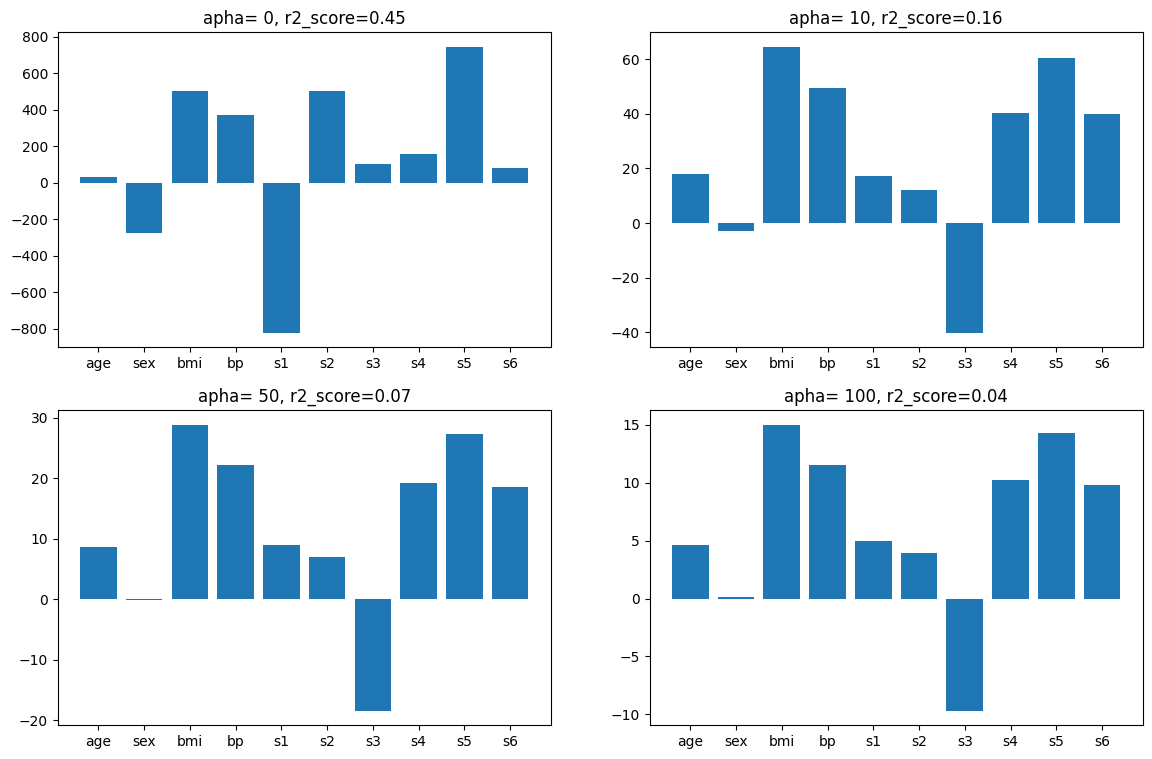

In [26]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title(f"apha= 0, r2_score={round(r2_scores[0],2)}")

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title(f"apha= 10, r2_score={round(r2_scores[1],2)}")

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title(f"apha= 50, r2_score={round(r2_scores[2],2)}")

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title(f"apha= 100, r2_score={round(r2_scores[3],2)}")
plt.show()

### This plot shows that increasing the values of lambda(λ) will srink the values of m towards 0 but never be 0.